In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.subplots as sp
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

py.init_notebook_mode(connected = True)
pd.set_option('display.max_columns', 500)

upset_Count = "/content/drive/Shareddrives/Data Mining Project/Datasets/Upset Count Data.csv"
Game_Data = "/content/drive/Shareddrives/Data Mining Project/Datasets/2023 Game Data (1).csv"

df_GameData = pd.read_csv(Game_Data)

In [ ]:
df_GameData.head(4)

,YEAR,SEED,TEAM,TEAM ROUND,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,BARTTORVIK ADJUSTED DEFENSE,BARTHAG,ELITE SOS,BARTTORVIK ADJUSTED TEMPO,2PT %,3PT %,FREE THROW %,EFG %,FREE THROW RATE,3PT RATE,ASSIST %,OFFENSIVE REBOUND %,DEFENSIVE REBOUND %,BLOCK %,TURNOVER %,2PT % DEFENSE,3PT % DEFENSE,FREE THROW % DEFENSE,EFG % DEFENSE,FREE THROW RATE DEFENSE,3PT RATE DEFENSE,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,TEAM.1
0,2023,1,Alabama,0,0,26.93630,115.832,88.896,72.7700,27.588,116.981,89.393,0.957,33.867,72.704,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,10.6,85.294118,1.106,0.922,Alabama
1,2023,16,Texas A&M Corpus Chris,0,0,-0.20120,107.470,107.671,69.2125,-1.386,106.067,107.453,0.463,9.693,69.214,49.0,36.9,80.0,51.2,34.4,34.9,55.8,32.5,72.1,4.5,18.0,54.1,33.3,69.1,52.4,38.6,41.1,55.8,27.9,67.5,8.6,20.9,-5.9,65.517241,1.098,1.023,Texas A&M Corpus Chris
2,2023,1,Alabama,0,0,26.93630,115.832,88.896,72.7700,27.588,116.981,89.393,0.957,33.867,72.704,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,10.6,85.294118,1.106,0.922,Alabama
3,2023,16,Southeast Missouri St.,0,0,-7.21211,101.029,108.241,72.5024,-7.989,100.349,108.338,0.293,8.871,72.211,50.0,33.3,71.8,50.0,38.3,39.8,51.1,25.3,72.1,8.5,17.3,50.8,35.3,69.0,51.6,43.6,35.5,50.7,27.9,74.7,7.7,19.0,-11.4,51.515152,1.028,1.034,Southeast Missouri St.


In [ ]:
df_GameData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YEAR                            148 non-null    int64  
 1   SEED                            148 non-null    int64  
 2   TEAM                            148 non-null    object 
 3   TEAM ROUND                      148 non-null    int64  
 4   CURRENT ROUND                   148 non-null    int64  
 5   KENPOM ADJUSTED EFFICIENCY      148 non-null    float64
 6   KENPOM ADJUSTED OFFENSE         148 non-null    float64
 7   KENPOM ADJUSTED DEFENSE         148 non-null    float64
 8   KENPOM ADJUSTED TEMPO           148 non-null    float64
 9   BARTTORVIK ADJUSTED EFFICIENCY  148 non-null    float64
 10  BARTTORVIK ADJUSTED OFFENSE     148 non-null    float64
 11  BARTTORVIK ADJUSTED DEFENSE     148 non-null    float64
 12  BARTHAG                         148 

In [ ]:
# Checks for mising values (cleaning data)
df_GameData.isnull().values.any()

False

In [ ]:
df_GameData.sort_values('TEAM', ascending=False)

,YEAR,SEED,TEAM,TEAM ROUND,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,BARTTORVIK ADJUSTED DEFENSE,BARTHAG,ELITE SOS,BARTTORVIK ADJUSTED TEMPO,2PT %,3PT %,FREE THROW %,EFG %,FREE THROW RATE,3PT RATE,ASSIST %,OFFENSIVE REBOUND %,DEFENSIVE REBOUND %,BLOCK %,TURNOVER %,2PT % DEFENSE,3PT % DEFENSE,FREE THROW % DEFENSE,EFG % DEFENSE,FREE THROW RATE DEFENSE,3PT RATE DEFENSE,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,TEAM.1
108,2023,3,Xavier,0,0,19.6900,119.389,99.6988,70.3120,19.483,119.185,99.702,0.886,30.165,70.436,54.0,39.5,71.4,55.6,30.8,31.3,63.8,31.8,74.6,7.8,17.5,48.7,35.9,72.4,50.4,27.1,34.2,54.3,25.4,68.2,9.4,16.5,5.1,73.529412,1.129,1.027,Xavier
24,2023,3,Xavier,0,0,19.6900,119.389,99.6988,70.3120,19.483,119.185,99.702,0.886,30.165,70.436,54.0,39.5,71.4,55.6,30.8,31.3,63.8,31.8,74.6,7.8,17.5,48.7,35.9,72.4,50.4,27.1,34.2,54.3,25.4,68.2,9.4,16.5,5.1,73.529412,1.129,1.027,Xavier
116,2023,3,Xavier,0,0,19.6900,119.389,99.6988,70.3120,19.483,119.185,99.702,0.886,30.165,70.436,54.0,39.5,71.4,55.6,30.8,31.3,63.8,31.8,74.6,7.8,17.5,48.7,35.9,72.4,50.4,27.1,34.2,54.3,25.4,68.2,9.4,16.5,5.1,73.529412,1.129,1.027,Xavier
118,2023,3,Xavier,0,0,19.6900,119.389,99.6988,70.3120,19.483,119.185,99.702,0.886,30.165,70.436,54.0,39.5,71.4,55.6,30.8,31.3,63.8,31.8,74.6,7.8,17.5,48.7,35.9,72.4,50.4,27.1,34.2,54.3,25.4,68.2,9.4,16.5,5.1,73.529412,1.129,1.027,Xavier
65,2023,9,West Virginia,0,0,19.1450,117.222,98.0770,68.8134,19.839,117.409,97.570,0.894,35.844,68.745,51.3,34.8,74.1,51.7,39.7,36.3,50.5,33.7,70.7,8.7,18.5,50.5,34.1,72.7,50.7,38.5,35.0,50.3,29.3,66.3,6.3,20.9,1.8,57.575758,1.088,1.013,West Virginia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2023,1,Alabama,0,0,26.9363,115.832,88.8960,72.7700,27.588,116.981,89.393,0.957,33.867,72.704,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,10.6,85.294118,1.106,0.922,Alabama
2,2023,1,Alabama,0,0,26.9363,115.832,88.8960,72.7700,27.588,116.981,89.393,0.957,33.867,72.704,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,10.6,85.294118,1.106,0.922,Alabama
80,2023,1,Alabama,0,0,26.9363,115.832,88.8960,72.7700,27.588,116.981,89.393,0.957,33.867,72.704,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,10.6,85.294118,1.106,0.922,Alabama
72,2023,1,Alabama,0,0,26.9363,115.832,88.8960,72.7700,27.588,116.981,89.393,0.957,33.867,72.704,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,10.6,85.294118,1.106,0.922,Alabama


In [ ]:
# Drop the 'TEAM ROUND' and 'CURRENT ROUND' columns from the DataFrame as they hold no relevance
df_GameData = df_GameData.drop(columns=['TEAM ROUND', 'CURRENT ROUND'])


In [ ]:
# Drop duplicate rows based on the 'TEAM' column
df_GameData.drop_duplicates(subset=['TEAM'], keep='first', inplace=True)
df2 = df_GameData.drop(["KENPOM ADJUSTED EFFICIENCY", 'KENPOM ADJUSTED TEMPO', 'BARTTORVIK ADJUSTED EFFICIENCY', 'BARTTORVIK ADJUSTED OFFENSE', 'BARTTORVIK ADJUSTED DEFENSE', 'BARTHAG', 'ELITE SOS', 'BARTTORVIK ADJUSTED TEMPO', 'WINS ABOVE BUBBLE'], axis=1)


In [ ]:
# This is the dataset that we'll be using throughout the project
df2.sort_values('TEAM', ascending=True)

,YEAR,SEED,TEAM,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,2PT %,3PT %,FREE THROW %,EFG %,FREE THROW RATE,3PT RATE,ASSIST %,OFFENSIVE REBOUND %,DEFENSIVE REBOUND %,BLOCK %,TURNOVER %,2PT % DEFENSE,3PT % DEFENSE,FREE THROW % DEFENSE,EFG % DEFENSE,FREE THROW RATE DEFENSE,3PT RATE DEFENSE,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,TEAM.1
0,2023,1,Alabama,115.832,88.8960,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,85.294118,1.106,0.922,Alabama
12,2023,2,Arizona,120.078,97.2023,56.6,38.2,70.9,56.8,36.5,38.0,65.3,31.1,73.8,8.3,18.4,45.9,32.8,71.4,47.2,26.0,38.7,49.4,26.2,68.9,9.3,16.9,82.352941,1.134,0.981,Arizona
53,2023,11,Arizona St.,107.689,95.3115,47.9,31.4,68.9,47.5,30.8,39.5,56.9,29.6,68.2,13.2,16.9,43.8,33.6,70.2,46.4,33.4,39.1,53.9,31.8,70.4,8.2,20.6,64.705882,1.006,0.968,Arizona St.
70,2023,8,Arkansas,112.703,94.0642,53.8,31.7,69.0,52.0,38.8,28.2,49.6,30.5,71.8,13.4,18.3,46.9,30.6,71.4,46.5,38.9,30.1,44.2,28.2,69.5,6.8,20.4,60.606061,1.058,0.958,Arkansas
69,2023,9,Auburn,112.771,95.3652,51.0,31.4,70.2,49.6,35.5,35.4,55.0,33.3,68.0,13.7,18.1,46.9,28.8,70.5,45.6,39.1,34.2,48.7,32.0,66.7,8.6,19.3,62.500000,1.054,0.972,Auburn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,2023,12,VCU,106.597,94.1587,52.3,34.7,69.7,52.2,41.8,32.8,53.1,29.0,70.2,12.7,19.5,46.2,32.3,70.3,47.0,30.5,34.1,51.0,29.8,71.0,9.7,24.1,79.411765,1.044,0.919,VCU
15,2023,15,Vermont,109.881,104.4540,55.5,36.2,70.3,54.9,28.4,43.3,52.1,19.3,77.5,8.3,14.2,50.0,34.6,72.4,50.7,26.9,36.1,44.8,22.5,80.7,8.5,16.8,68.750000,1.090,1.007,Vermont
28,2023,4,Virginia,111.280,94.8364,50.4,35.3,70.1,51.3,34.5,36.1,65.8,25.5,75.0,13.5,13.7,46.5,34.0,74.8,48.3,26.1,39.7,52.9,25.0,74.5,11.0,19.7,78.125000,1.083,0.962,Virginia
65,2023,9,West Virginia,117.222,98.0770,51.3,34.8,74.1,51.7,39.7,36.3,50.5,33.7,70.7,8.7,18.5,50.5,34.1,72.7,50.7,38.5,35.0,50.3,29.3,66.3,6.3,20.9,57.575758,1.088,1.013,West Virginia


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 71
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           68 non-null     int64  
 1   SEED                           68 non-null     int64  
 2   TEAM                           68 non-null     object 
 3   KENPOM ADJUSTED OFFENSE        68 non-null     float64
 4   KENPOM ADJUSTED DEFENSE        68 non-null     float64
 5   2PT %                          68 non-null     float64
 6   3PT %                          68 non-null     float64
 7   FREE THROW %                   68 non-null     float64
 8   EFG %                          68 non-null     float64
 9   FREE THROW RATE                68 non-null     float64
 10  3PT RATE                       68 non-null     float64
 11  ASSIST %                       68 non-null     float64
 12  OFFENSIVE REBOUND %            68 non-null     float

In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sort the DataFrame by WIN% in descending order
df_GameData_sorted = df_GameData.sort_values('WIN %', ascending=False)

# Display the 'TEAM', 'WIN %', and 'SEED' columns of the sorted DataFrame
print(df_GameData_sorted[['TEAM', 'WIN %', 'SEED']])

                      TEAM      WIN %  SEED
8                  Houston  91.176471     1
37   College of Charleston  90.909091    12
67        Florida Atlantic  90.625000     9
39            Oral Roberts  86.666667    12
0                  Alabama  85.294118     1
4                   Purdue  85.294118     1
18                    UCLA  85.294118     2
26                 Gonzaga  84.375000     3
14               Marquette  82.352941     2
12                 Arizona  82.352941     2
33                Kent St.  81.250000    13
36           San Diego St.  81.250000     5
10                  Kansas  79.411765     1
35                    Iona  79.411765    13
43                     VCU  79.411765    12
41                   Drake  78.787879    12
21        UC Santa Barbara  78.125000    14
28                Virginia  78.125000     4
42            Saint Mary's  78.125000     5
40                Miami FL  78.125000     5
19           UNC Asheville  78.125000    15
29                  Furman  77.4

In [ ]:
# Group the DataFrame by the "seed" column
grouped = df_GameData.groupby('SEED')

# Calculate the mean of the "win %" column for each group
win_pct_avg = grouped['WIN %'].mean()

# Print the result
print(win_pct_avg)

SEED
1     85.294118
2     81.617647
3     74.632353
4     72.561553
5     78.492647
6     63.068182
7     68.293002
8     65.022003
9     68.300189
10    69.809930
11    66.345470
12    83.943850
13    78.686947
14    72.454637
15    73.250737
16    55.241286
Name: WIN %, dtype: float64


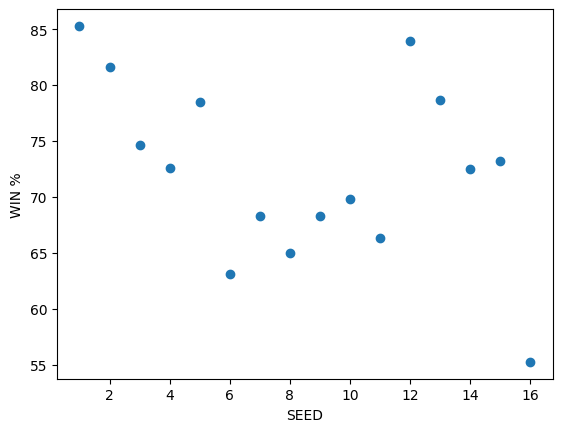

In [ ]:
grouped = df_GameData.groupby('SEED')
win_pct_avg = grouped['WIN %'].mean()

# Set the x-axis values to the unique seed values
x = sorted(df_GameData['SEED'].unique())

# Set the y-axis values to the mean "win %" for each seed value
y = [win_pct_avg[seed] for seed in x]

# Create a scatter plot
plt.scatter(x, y)

# Set the x-axis label
plt.xlabel('SEED')

# Set the y-axis label
plt.ylabel('WIN %')

# Show the plot
plt.show()

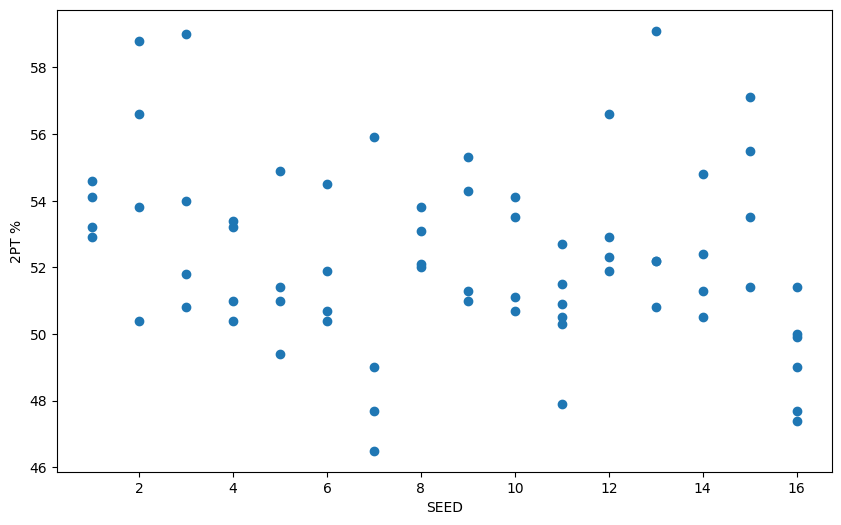

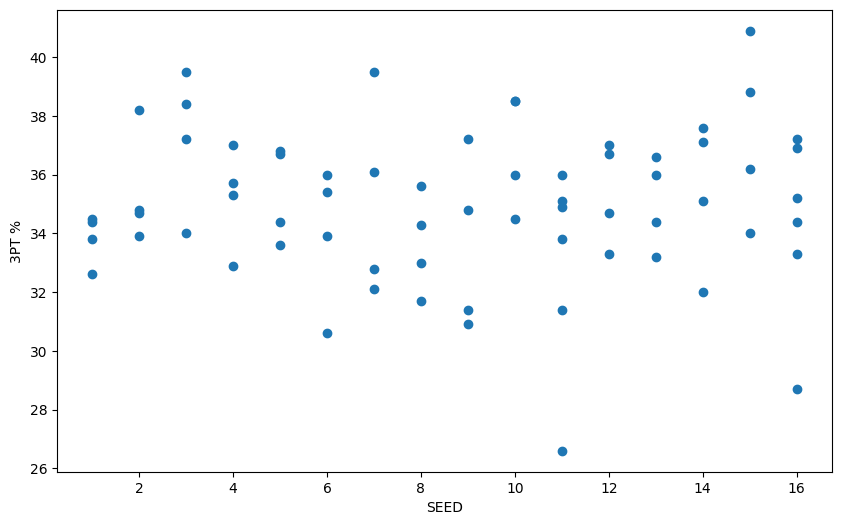

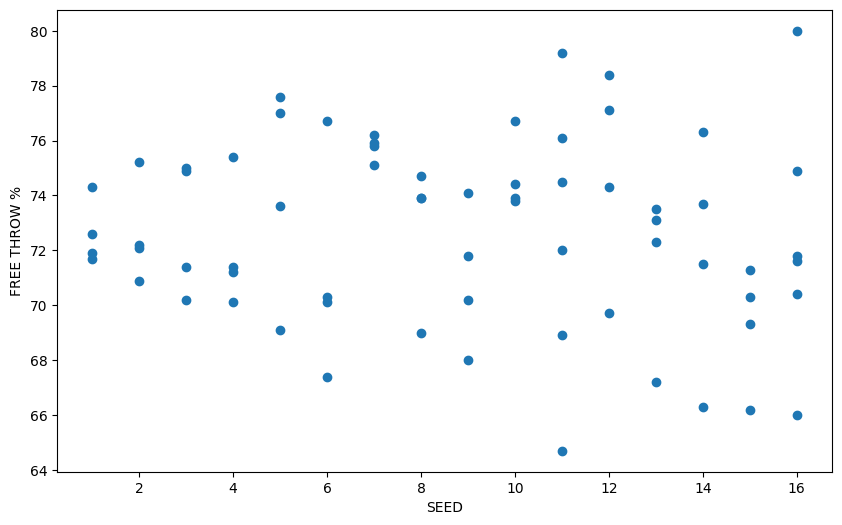

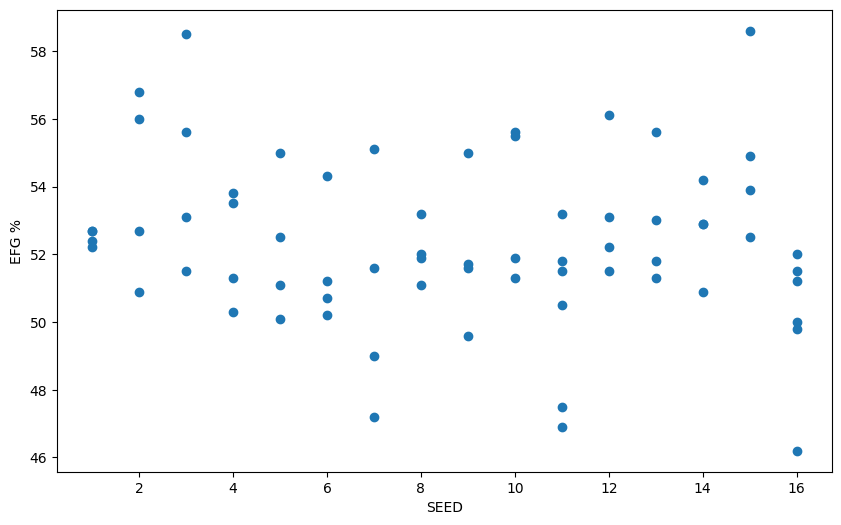

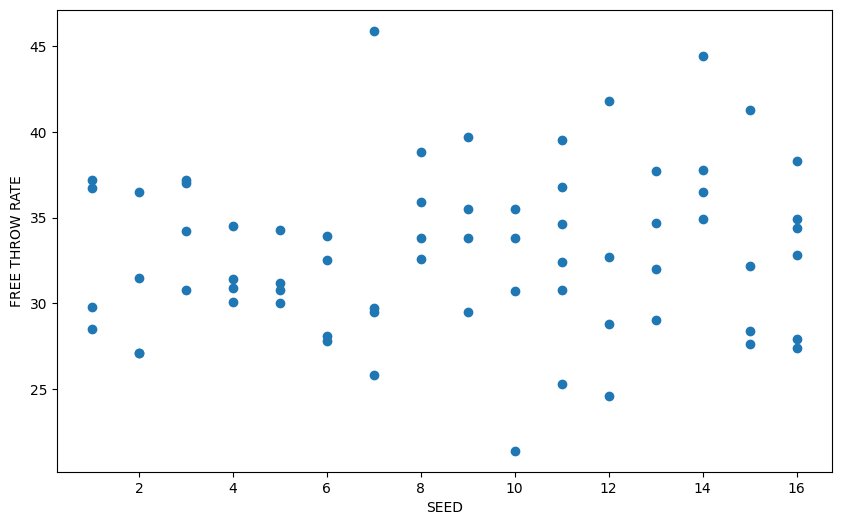

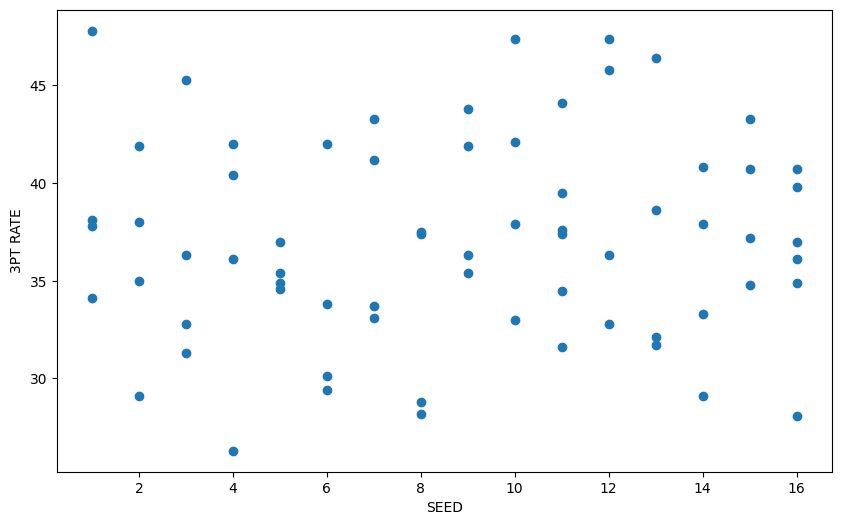

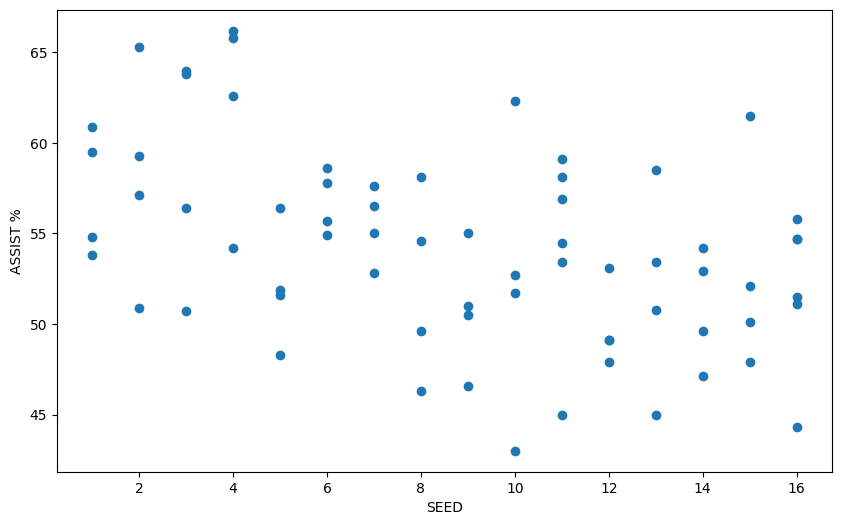

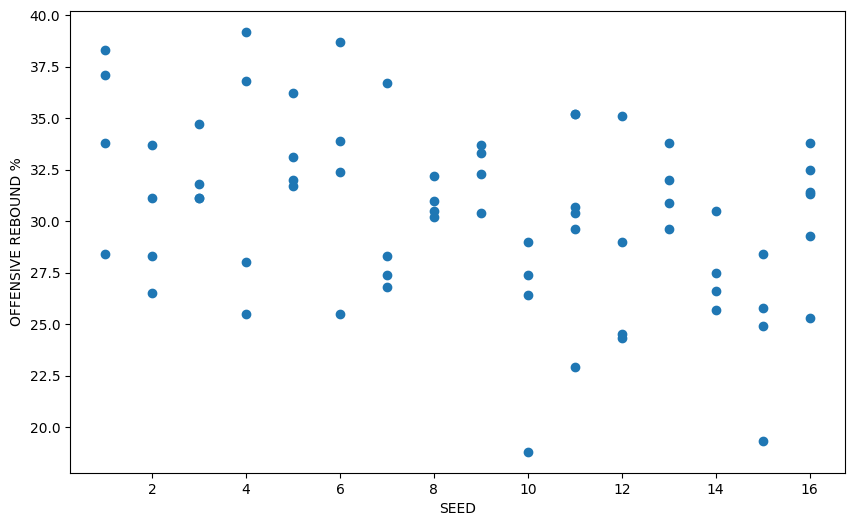

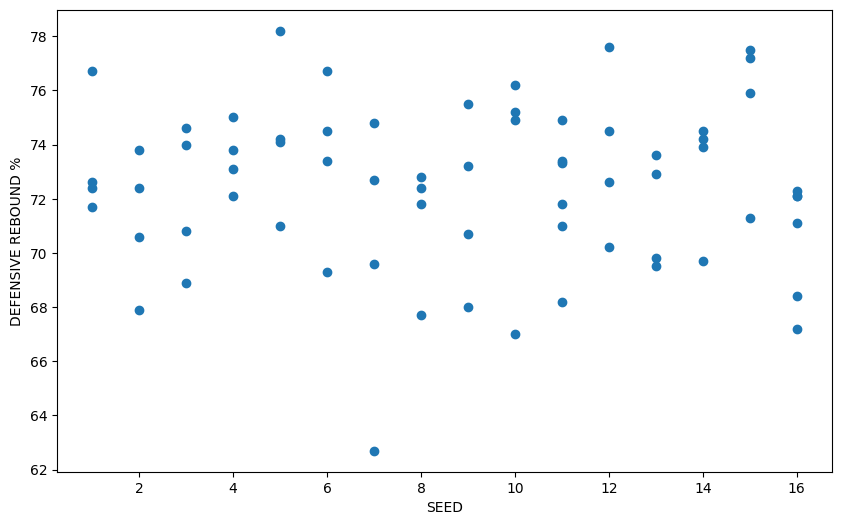

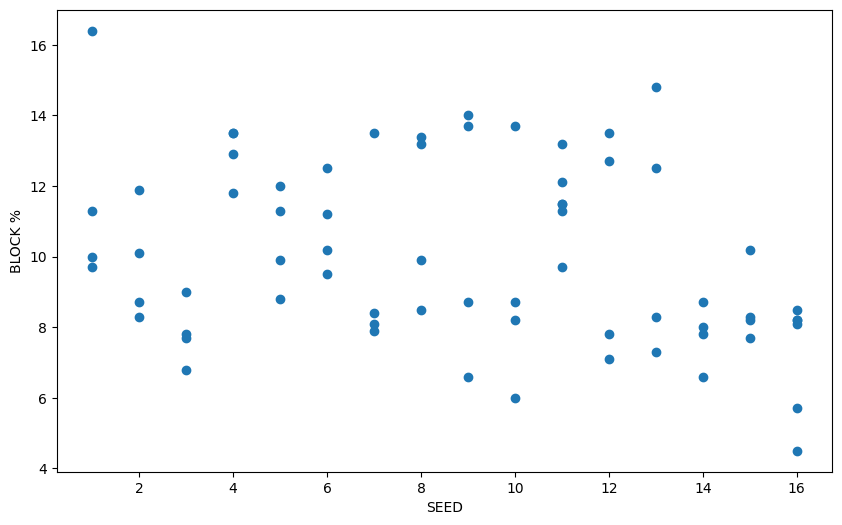

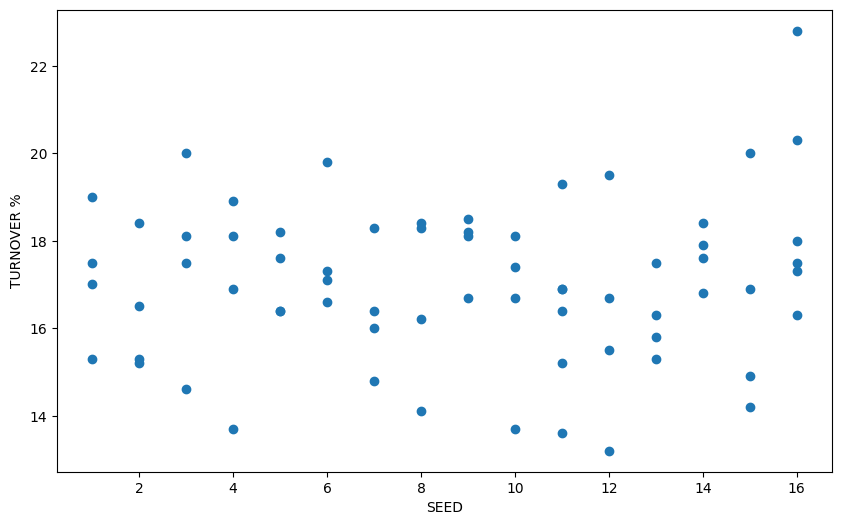

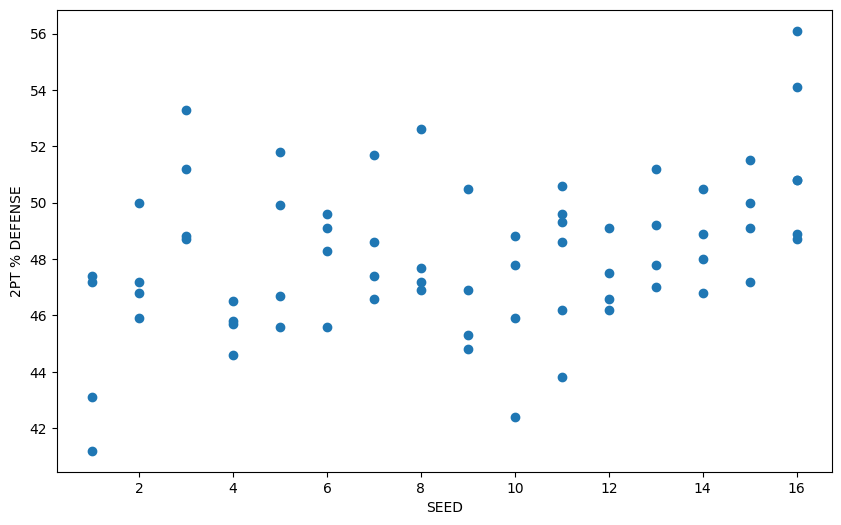

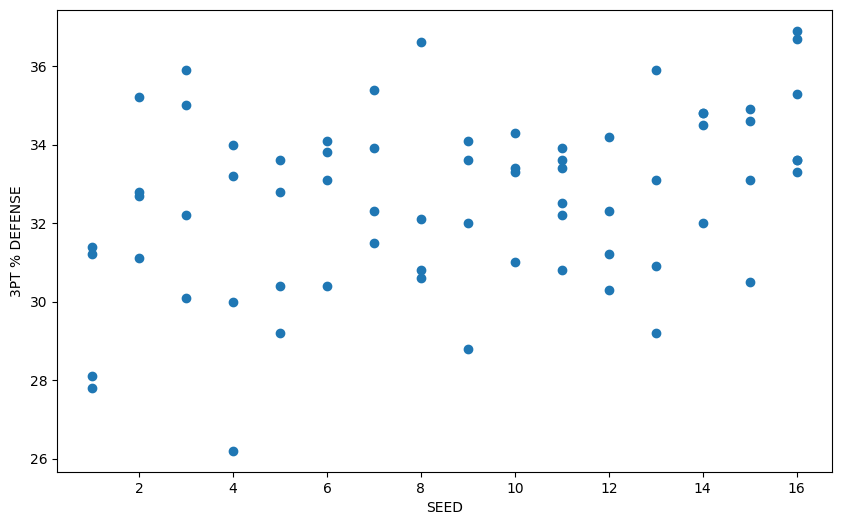

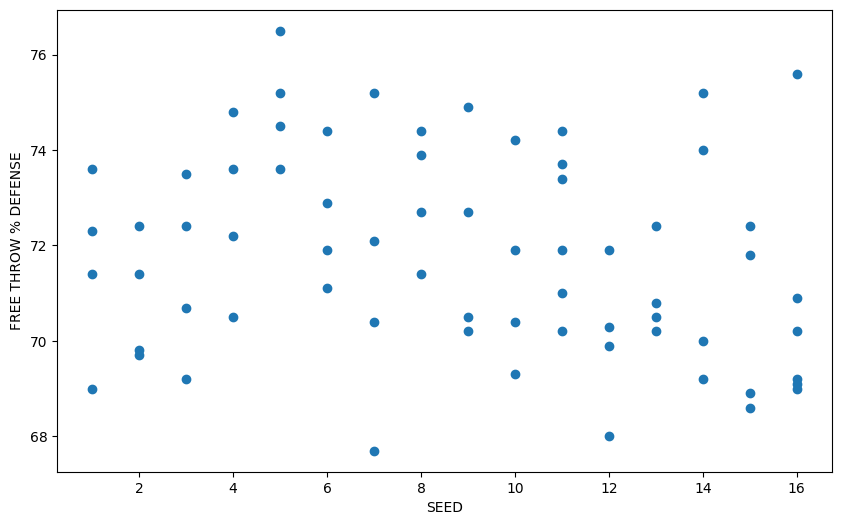

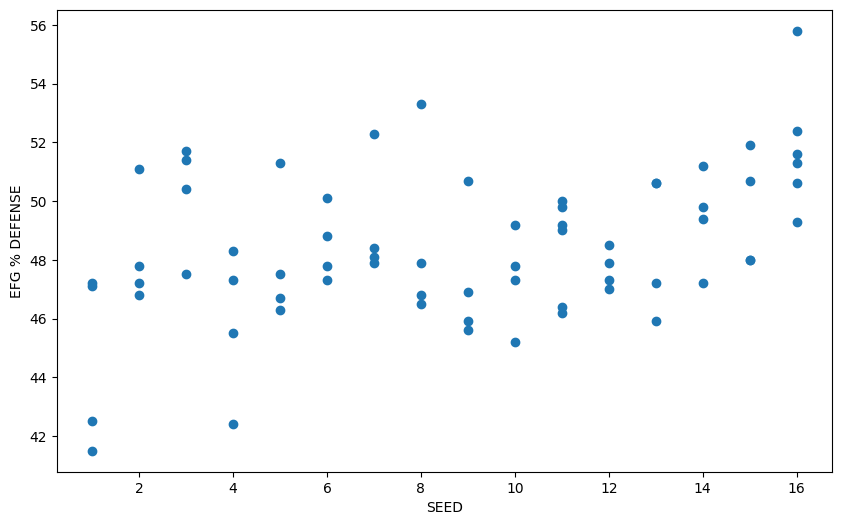

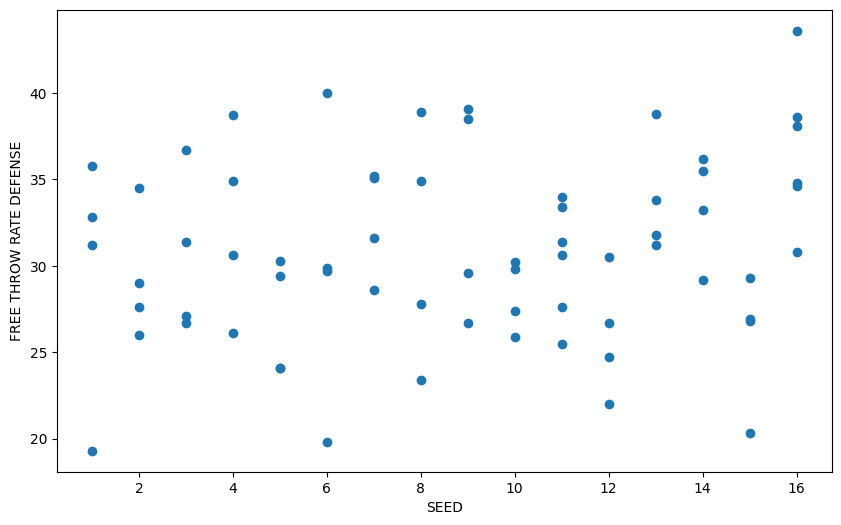

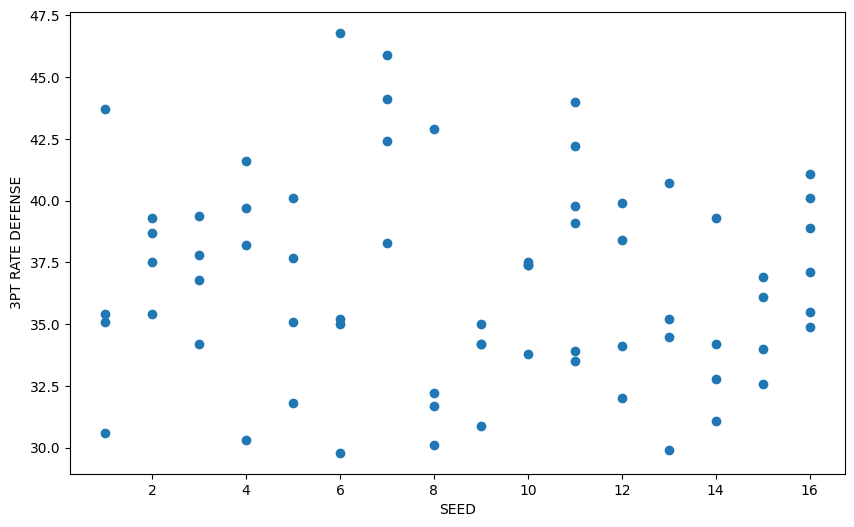

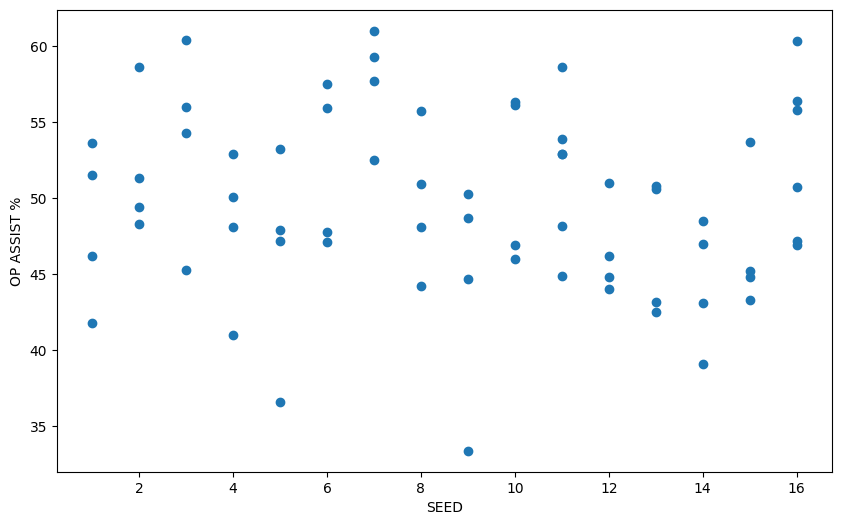

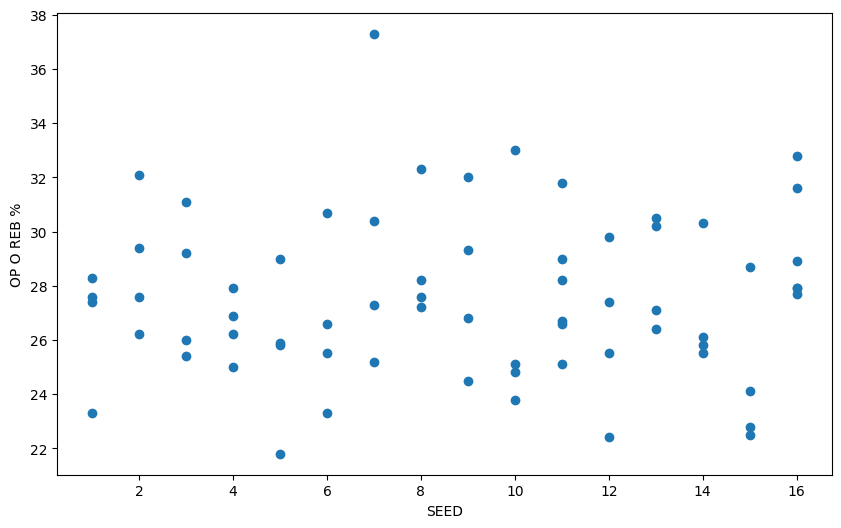

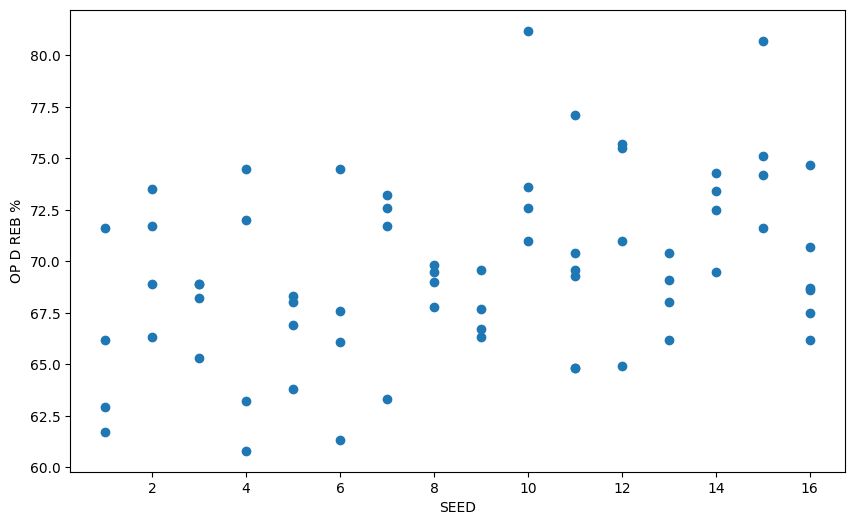

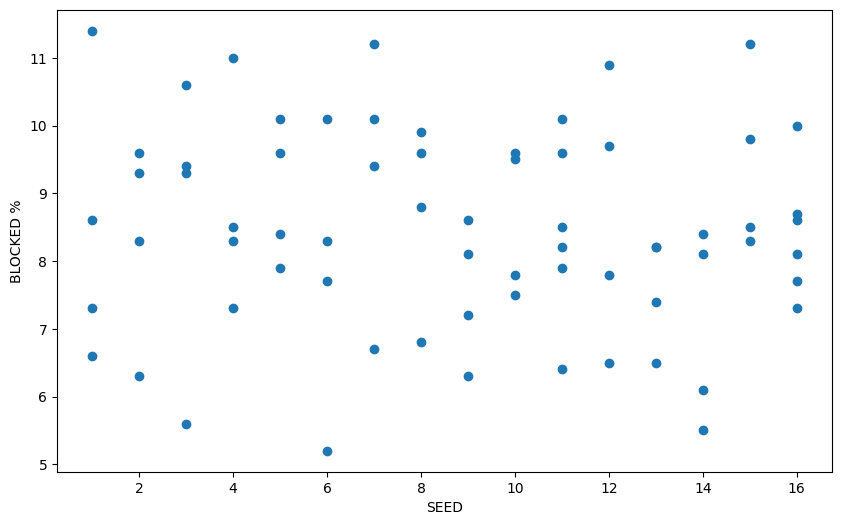

In [ ]:
# Define a list of possible labels
labels = ['2PT %', '3PT %', 'FREE THROW %', 'EFG %', 'FREE THROW RATE', '3PT RATE',
          'ASSIST %', 'OFFENSIVE REBOUND %', 'DEFENSIVE REBOUND %', 'BLOCK %', 'TURNOVER %',
          '2PT % DEFENSE', '3PT % DEFENSE', 'FREE THROW % DEFENSE', 'EFG % DEFENSE',
          'FREE THROW RATE DEFENSE', '3PT RATE DEFENSE', 'OP ASSIST %', 'OP O REB %',
          'OP D REB %', 'BLOCKED %']

# Loop over each label and create a scatter plot
for label in labels:
    # Get the x and y values from the dataset
    x = df_GameData['SEED']
    y = df_GameData[label]

    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Create a scatter plot
    plt.scatter(x, y)

    # Set the x-axis label
    plt.xlabel('SEED')

    # Set the y-axis label
    plt.ylabel(label)

    # Show the plot
    plt.show()

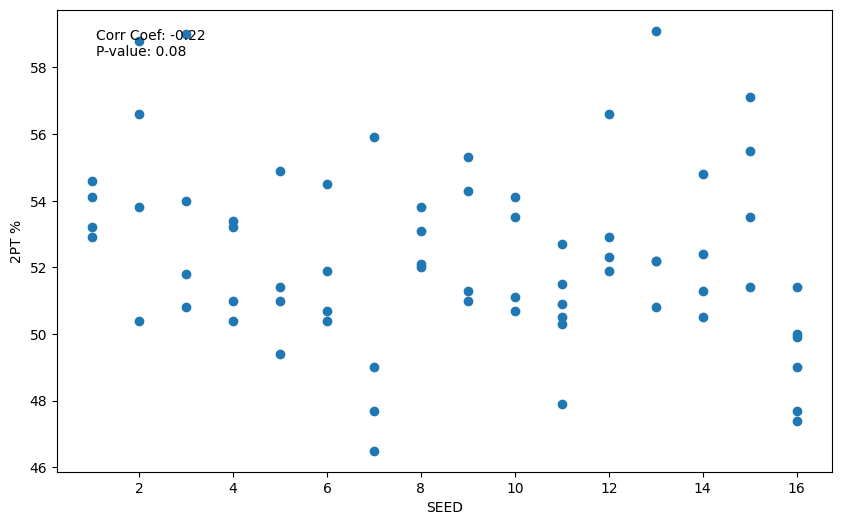

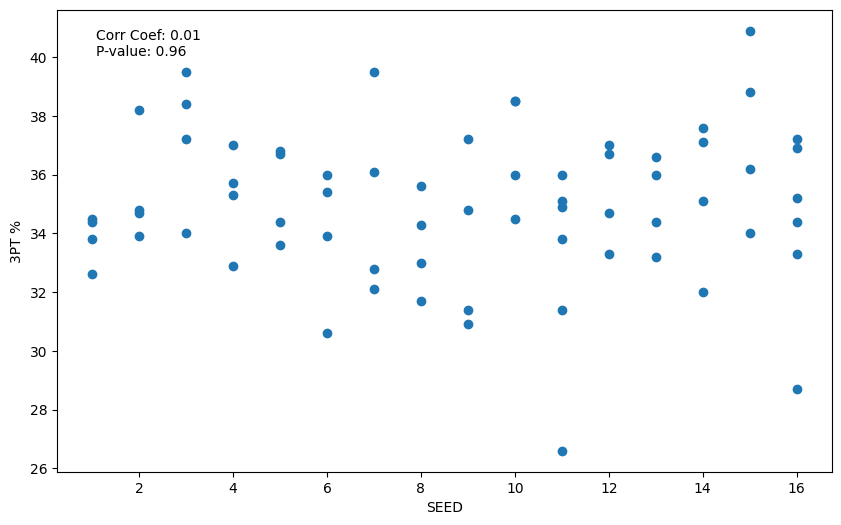

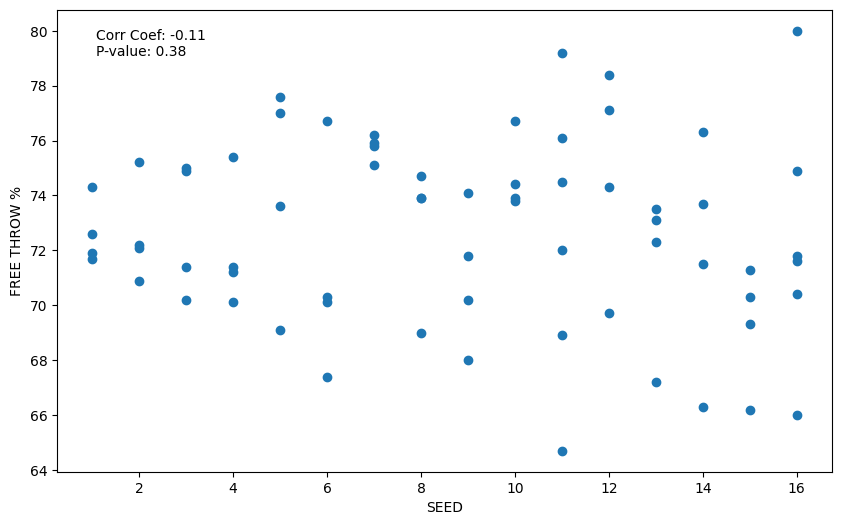

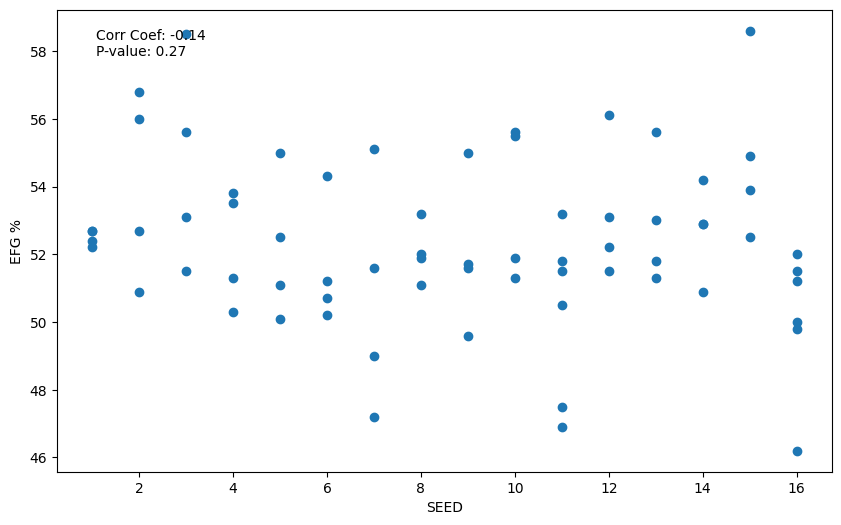

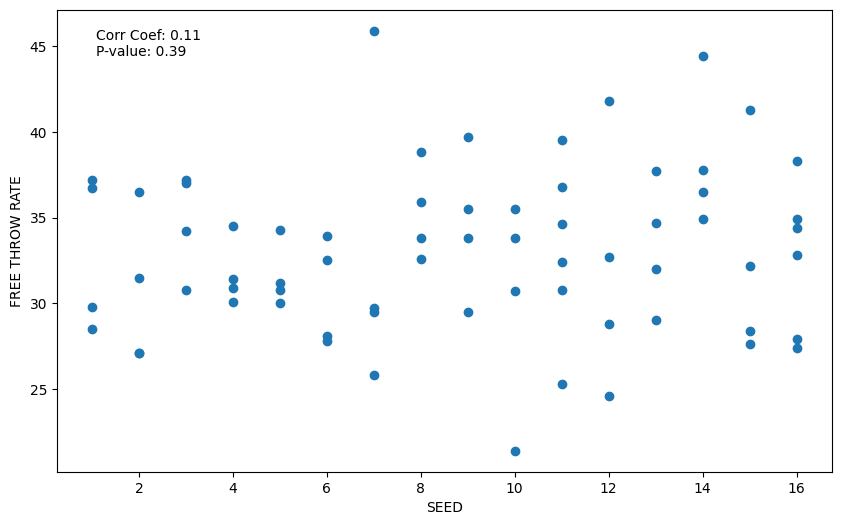

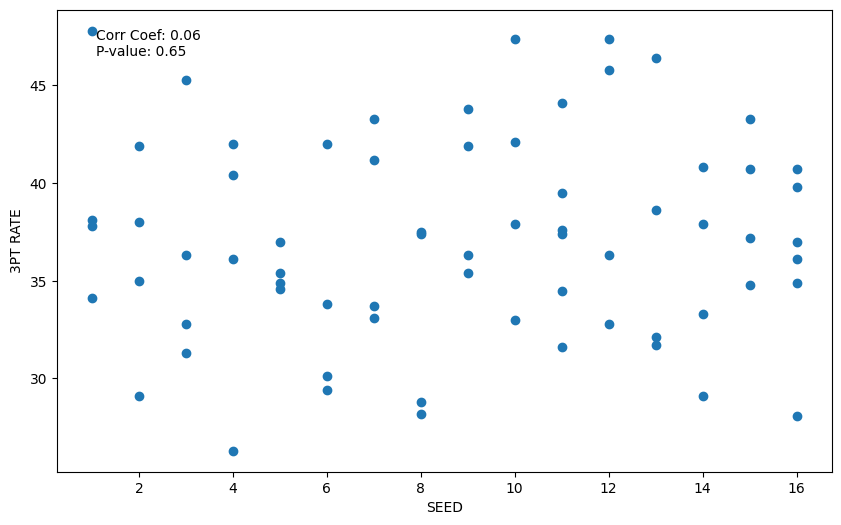

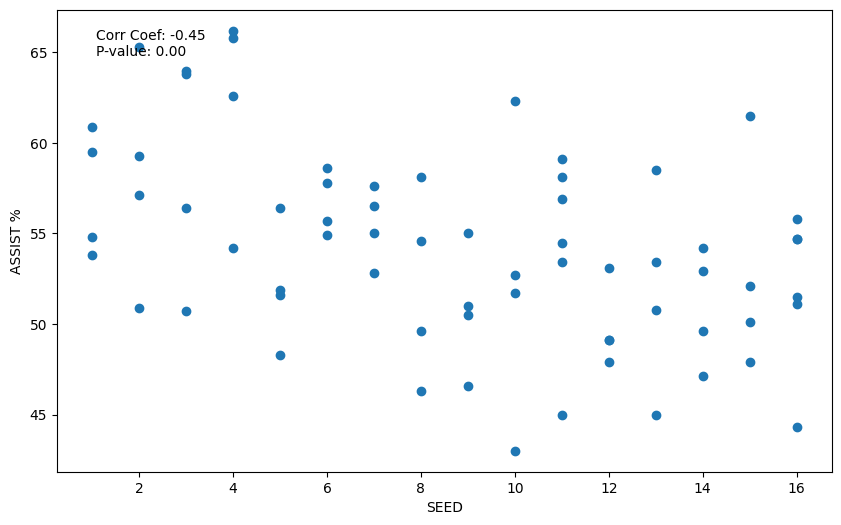

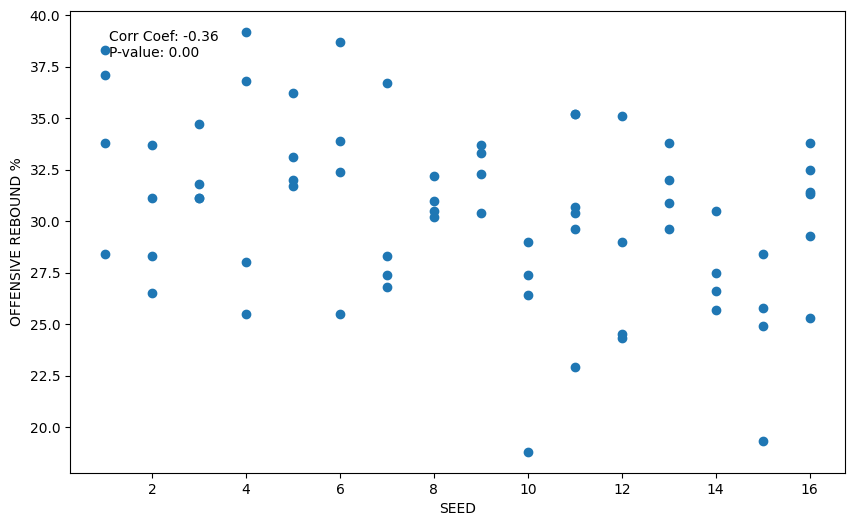

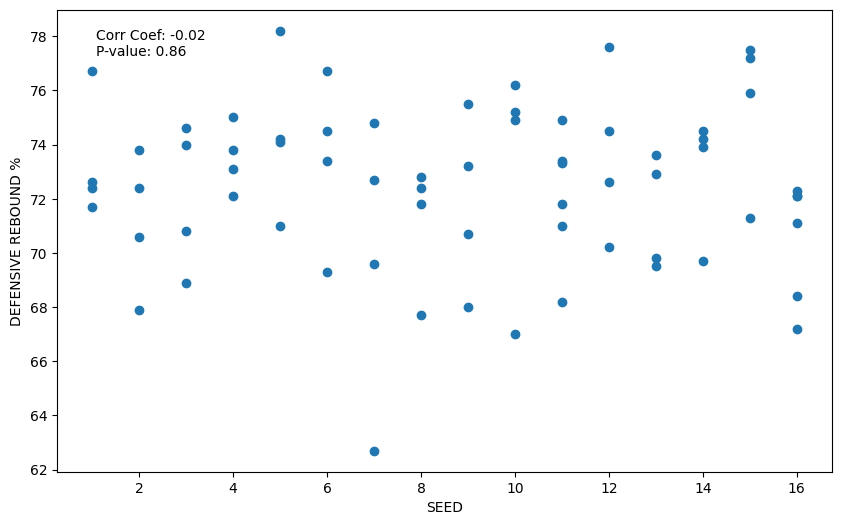

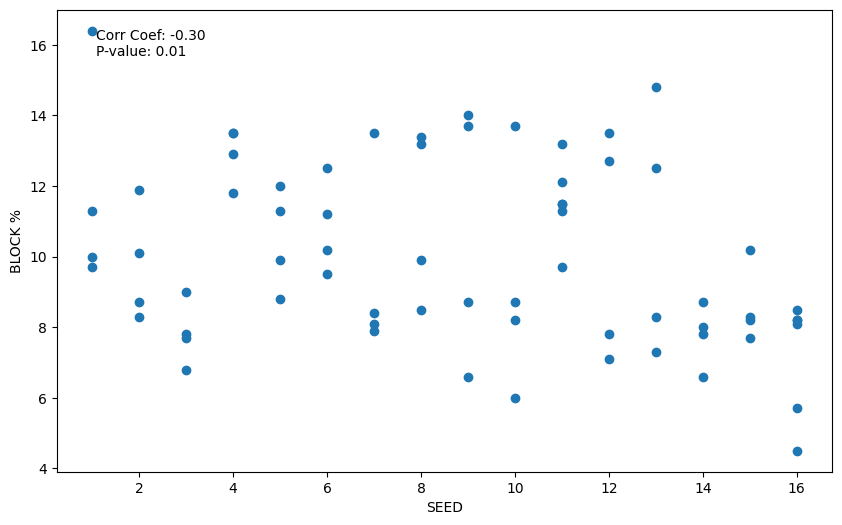

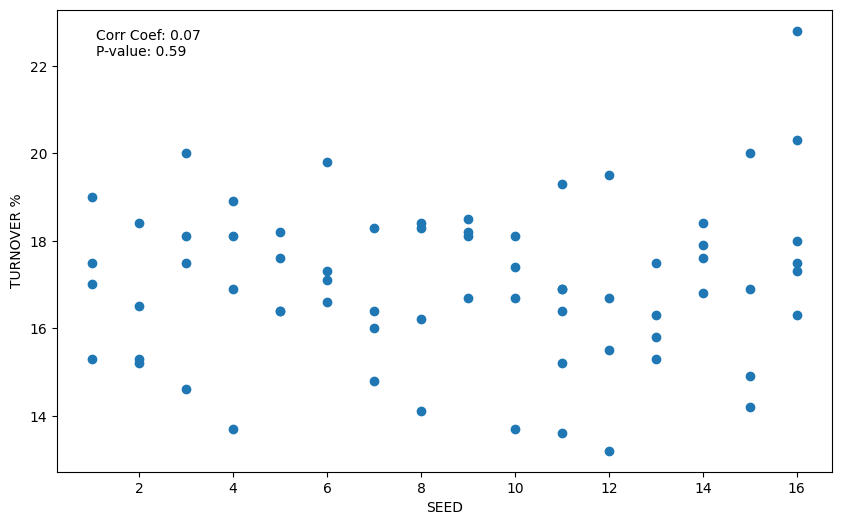

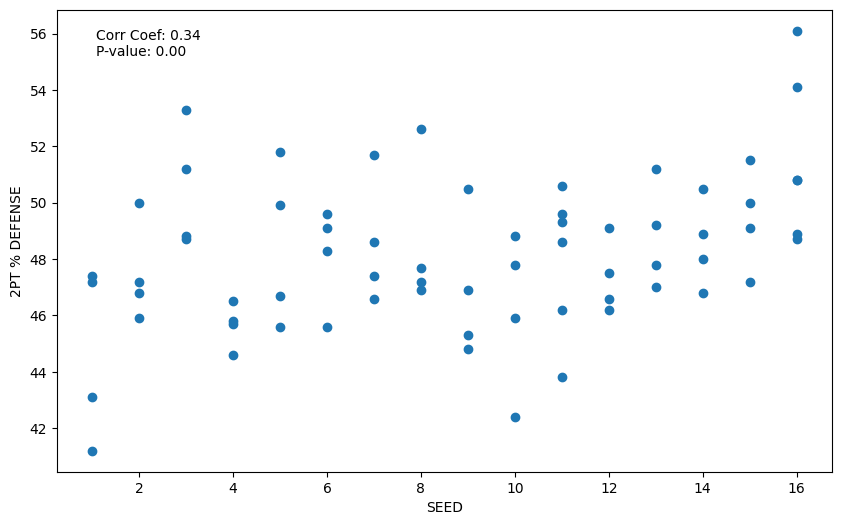

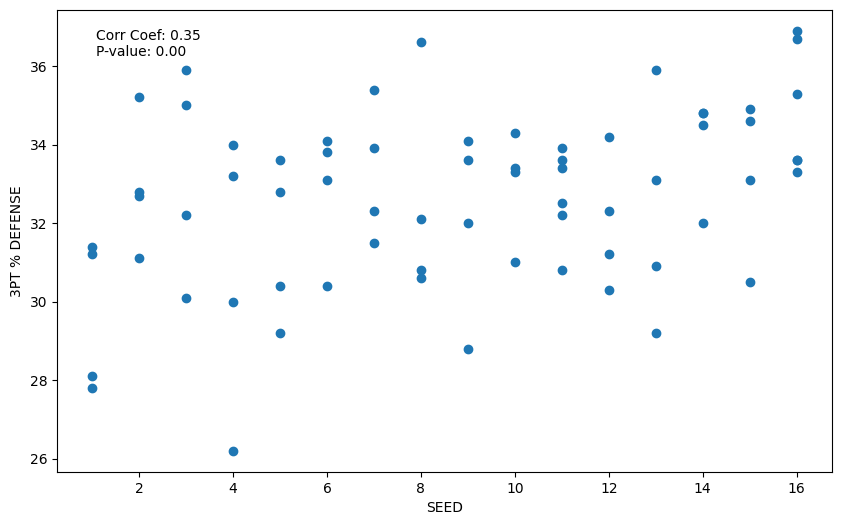

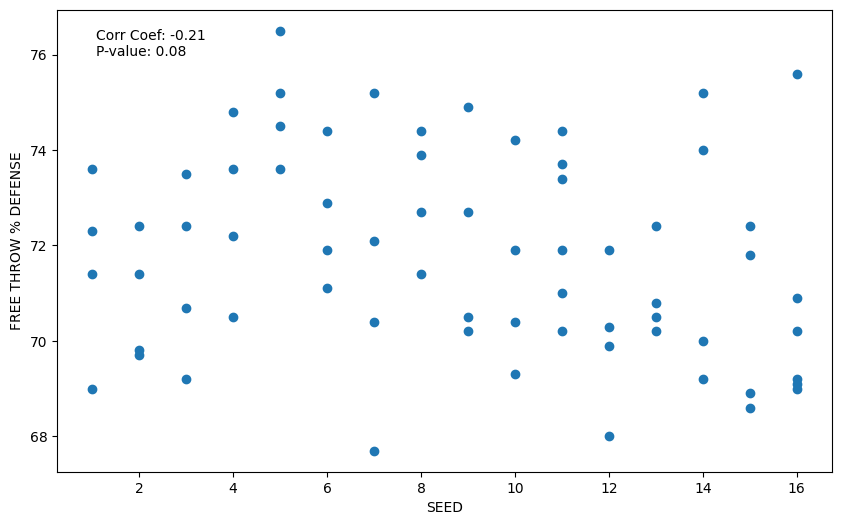

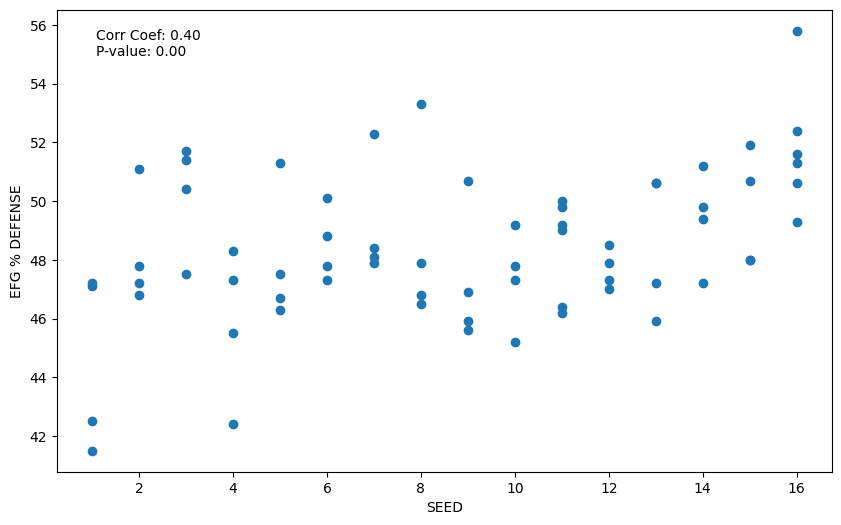

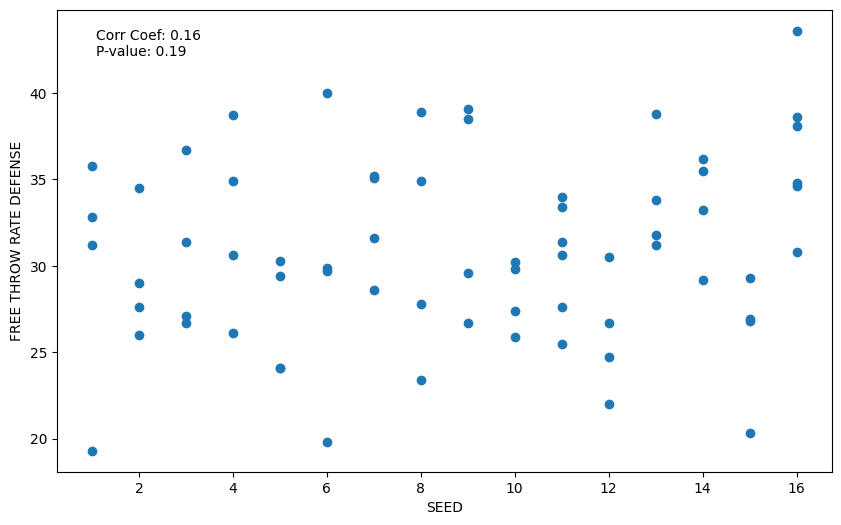

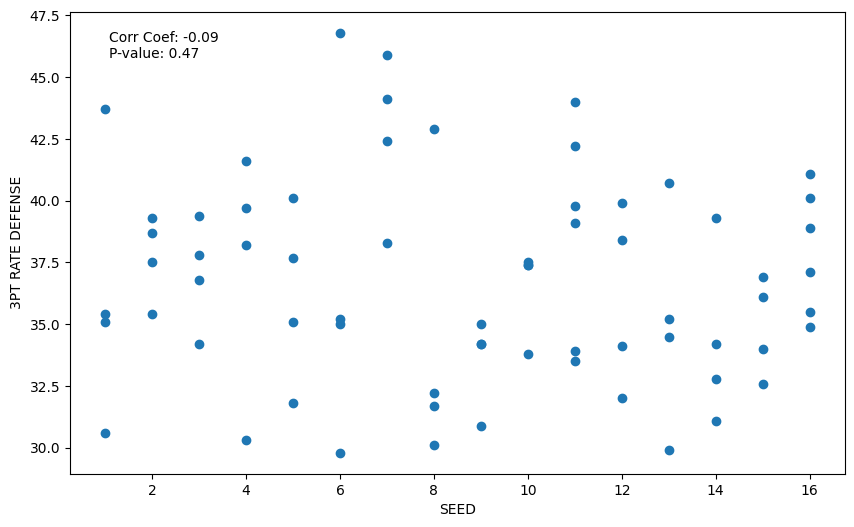

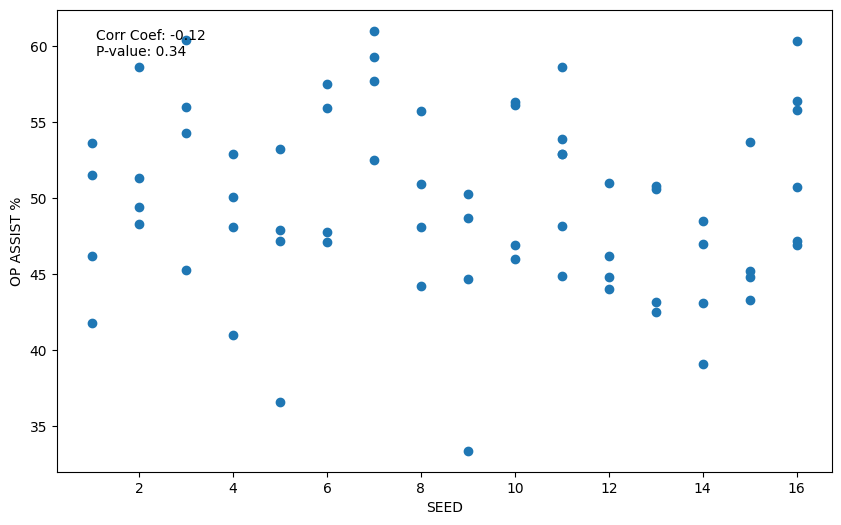

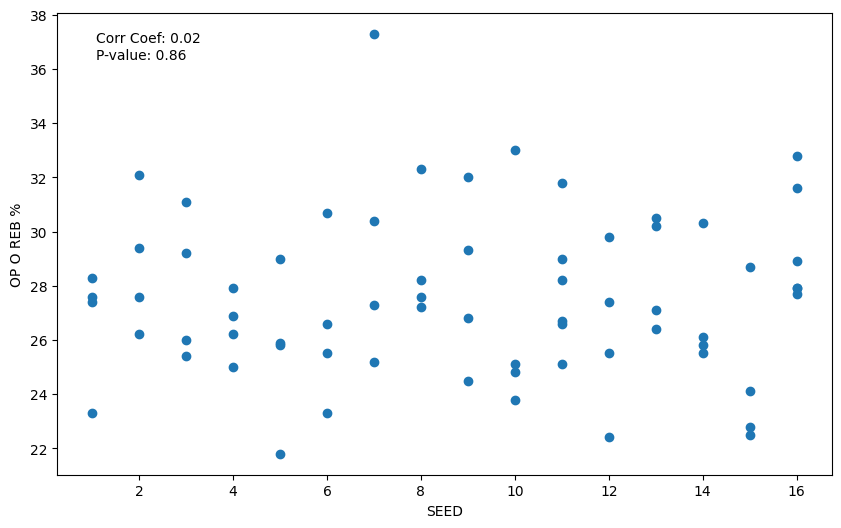

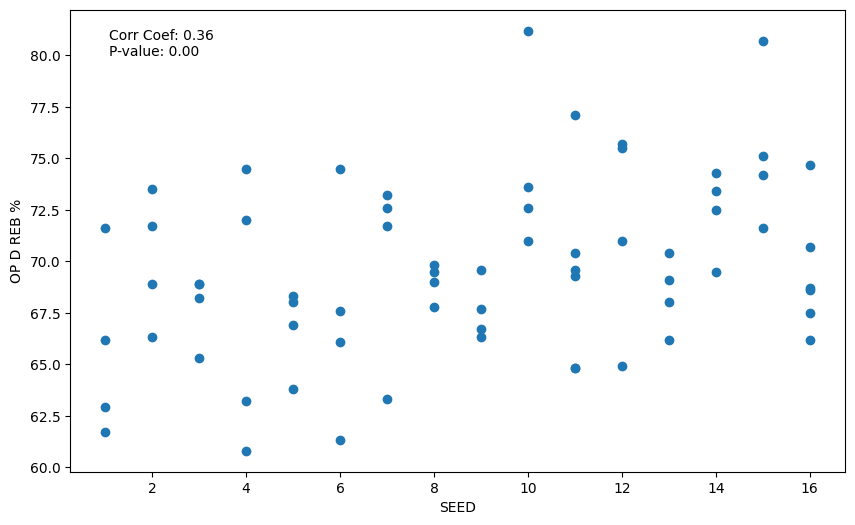

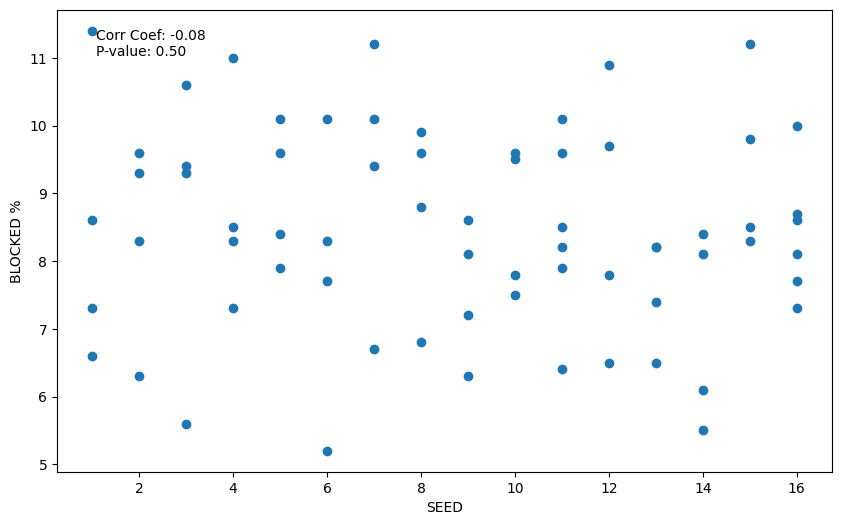

In [ ]:
from scipy.stats import pearsonr

# Define a list of possible labels
labels = ['2PT %', '3PT %', 'FREE THROW %', 'EFG %', 'FREE THROW RATE', '3PT RATE',
          'ASSIST %', 'OFFENSIVE REBOUND %', 'DEFENSIVE REBOUND %', 'BLOCK %', 'TURNOVER %',
          '2PT % DEFENSE', '3PT % DEFENSE', 'FREE THROW % DEFENSE', 'EFG % DEFENSE',
          'FREE THROW RATE DEFENSE', '3PT RATE DEFENSE', 'OP ASSIST %', 'OP O REB %',
          'OP D REB %', 'BLOCKED %']

# Loop over each label and create a scatter plot
for label in labels:
    # Get the x and y values from the dataset
    x = df_GameData['SEED']
    y = df_GameData[label]

    # Calculate the correlation coefficient and p-value
    corr_coef, p_value = pearsonr(x, y)

    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Create a scatter plot
    plt.scatter(x, y)

    # Set the x-axis label
    plt.xlabel('SEED')

    # Set the y-axis label
    plt.ylabel(label)

    # Add the correlation information to the plot
    plt.text(0.05, 0.9, f'Corr Coef: {corr_coef:.2f}\nP-value: {p_value:.2f}',
             transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

#DPI Creation and Implementation

In [ ]:
import pandas as pd

# Replace column names with their appropriate variable names
defensive_rating_col = 'KENPOM ADJUSTED DEFENSE'
efg_pct_defense_col = 'EFG % DEFENSE'
dreb_pct_col = 'DEFENSIVE REBOUND %'
top_col = 'TURNOVER %'

# Define the weights for each variable
w_defensive_rating = 0.2
w_efg_pct_defense = 0.4
w_dreb_pct = 0.2
w_top = 0.2

# Calculate DPI using the formula
df2['DPI'] = w_defensive_rating*df2[defensive_rating_col] + \
                     w_efg_pct_defense*df2[efg_pct_defense_col] + \
                     w_dreb_pct*df2[dreb_pct_col] + \
                     w_top*df2[top_col]


# Define the bins and labels for DPI values
bins = [52, 55, 58, float('inf')]
labels = ['low', 'medium', 'high']

# Add a new column with DPI categories
df2['DPI Category'] = pd.cut(df2['DPI'], bins=bins, labels=labels)

# View the resulting dataframe with the DPI column
df2.sort_values('TEAM', ascending=True)


,YEAR,SEED,TEAM,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,2PT %,3PT %,FREE THROW %,EFG %,FREE THROW RATE,3PT RATE,ASSIST %,OFFENSIVE REBOUND %,DEFENSIVE REBOUND %,BLOCK %,TURNOVER %,2PT % DEFENSE,3PT % DEFENSE,FREE THROW % DEFENSE,EFG % DEFENSE,FREE THROW RATE DEFENSE,3PT RATE DEFENSE,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,TEAM.1,DPI,DPI Category
0,2023,1,Alabama,115.8320,88.8960,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,85.294118,1.106,0.922,Alabama,52.65920,low
12,2023,2,Arizona,120.0780,97.2023,56.6,38.2,70.9,56.8,36.5,38.0,65.3,31.1,73.8,8.3,18.4,45.9,32.8,71.4,47.2,26.0,38.7,49.4,26.2,68.9,9.3,16.9,82.352941,1.134,0.981,Arizona,56.76046,medium
53,2023,11,Arizona St.,107.6890,95.3115,47.9,31.4,68.9,47.5,30.8,39.5,56.9,29.6,68.2,13.2,16.9,43.8,33.6,70.2,46.4,33.4,39.1,53.9,31.8,70.4,8.2,20.6,64.705882,1.006,0.968,Arizona St.,54.64230,low
70,2023,8,Arkansas,112.7030,94.0642,53.8,31.7,69.0,52.0,38.8,28.2,49.6,30.5,71.8,13.4,18.3,46.9,30.6,71.4,46.5,38.9,30.1,44.2,28.2,69.5,6.8,20.4,60.606061,1.058,0.958,Arkansas,55.43284,medium
69,2023,9,Auburn,112.7710,95.3652,51.0,31.4,70.2,49.6,35.5,35.4,55.0,33.3,68.0,13.7,18.1,46.9,28.8,70.5,45.6,39.1,34.2,48.7,32.0,66.7,8.6,19.3,62.500000,1.054,0.972,Auburn,54.53304,low
20,2023,3,Baylor,121.9470,101.9610,50.8,37.2,74.9,53.1,37.2,45.3,56.4,34.7,68.9,6.8,18.1,53.3,32.2,70.7,51.4,31.4,37.8,60.4,31.1,65.3,9.3,19.9,68.750000,1.132,1.031,Baylor,58.35220,high
63,2023,10,Boise St.,111.0810,93.9061,50.7,36.0,73.9,51.9,30.7,37.9,43.0,26.4,76.2,8.2,16.7,47.8,31.0,69.3,47.3,27.4,37.4,46.0,23.8,73.6,9.5,17.7,71.875000,1.058,0.954,Boise St.,56.28122,medium
17,2023,15,Colgate,113.0310,107.7760,57.1,40.9,66.2,58.6,27.6,34.8,61.5,24.9,75.9,7.7,14.9,51.5,34.9,68.6,51.9,20.3,36.9,53.7,24.1,75.1,8.3,17.6,75.757576,1.150,1.019,Colgate,60.47520,high
37,2023,12,College of Charleston,111.4600,99.7151,52.9,33.3,74.3,51.5,32.7,47.4,49.1,35.1,74.5,7.8,16.7,49.1,30.3,68.0,47.9,24.7,32.0,44.8,25.5,64.9,10.9,19.3,90.909091,1.126,0.944,College of Charleston,57.34302,medium
34,2023,4,Connecticut,119.5200,94.1749,53.4,35.7,75.4,53.5,31.4,42.0,62.6,39.2,73.8,12.9,18.9,45.8,30.0,73.6,45.5,38.7,30.3,41.0,26.2,60.8,8.3,19.4,75.757576,1.144,0.949,Connecticut,55.57498,medium


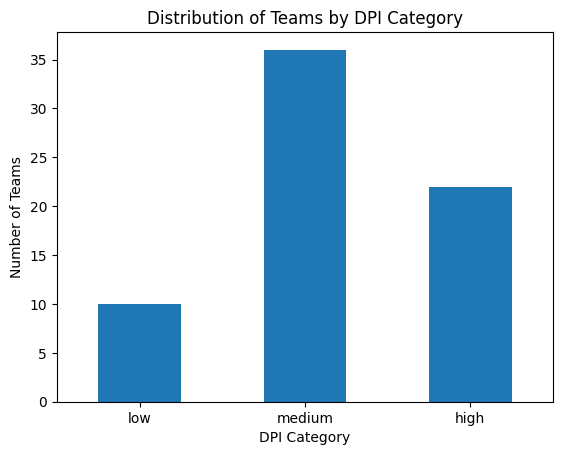

In [ ]:
import matplotlib.pyplot as plt

# Group by DPI category and count the number of teams in each category
dpi_counts = df2.groupby('DPI Category')['TEAM'].count()

# Create a bar graph of the DPI counts
dpi_counts.plot(kind='bar', rot=0)

# Add labels and title to the graph
plt.xlabel('DPI Category')
plt.ylabel('Number of Teams')
plt.title('Distribution of Teams by DPI Category')

# Display the graph
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of DPI values with bell curve
plt.hist(df2['DPI'], bins=20, density=True, alpha=0.7, color='blue', edgecolor='black', label='DPI Values')

# Calculate mean and standard deviation of DPI values
mean_dpi = df2['DPI'].mean()
std_dpi = df2['DPI'].std()

# Generate x-values for the bell curve
x_values = np.linspace(df2['DPI'].min(), df2['DPI'].max(), 100)

# Generate y-values for the bell curve using probability density function
y_values = 1 / (std_dpi * np.sqrt(2 * np.pi)) * np.exp(-(x_values - mean_dpi)**2 / (2 * std_dpi**2))

# Plot the bell curve
plt.plot(x_values, y_values, color='red', linewidth=2, label='Bell Curve')

plt.xlabel('DPI Value')
plt.ylabel('Density')
plt.title('Distribution of DPI Values')
plt.legend()
plt.show()



#OPI creation and Implementation

In [ ]:
import pandas as pd

# Replace column names with their appropriate variable names
offensive_rating_col = 'KENPOM ADJUSTED OFFENSE'
efg_pct_col = 'EFG %'
pts = 'POINTS PER POSSESSION OFFENSE'
FGA = '3PT RATE'
FTA = 'FREE THROW RATE'
two_pt = '2PT %'
three_pt = '3PT %'
FT_rate = 'FREE THROW RATE'


In [ ]:
w_2pt_pct_offense = 0.45
w_3pt_pct_offense = 0.35
w_ft_pct_offense = 0.1
w_efg_pct_offense = 0.05
w_ft_rate = 0.15
w_3pa_rate = 0.1
w_ast_rate = 0.05
w_oreb_pct = 0.05
w_dreb_pct = 0.1
w_blk_pct = 0.05
w_tov_pct = 0.1

df2['OPI'] = (w_2pt_pct_offense * df2['2PT %']) + \
             (w_3pt_pct_offense * df2['3PT %']) + \
             (w_ft_pct_offense * df2['FREE THROW %']) + \
             (w_efg_pct_offense * df2['EFG %']) + \
             (w_ft_rate * df2['FREE THROW RATE']) + \
             (w_3pa_rate * df2['3PT RATE']) + \
             (w_ast_rate * df2['ASSIST %']) + \
             (w_oreb_pct * df2['OFFENSIVE REBOUND %']) + \
             (w_dreb_pct * df2['DEFENSIVE REBOUND %']) + \
             (w_blk_pct * df2['BLOCK %']) - \
             (w_tov_pct * df2['TURNOVER %'])

min_opi = df2['OPI'].min()
max_opi = df2['OPI'].max()

new_min = 52
new_max = 64

df2['OPI'] = ((df2['OPI'] - min_opi) / (max_opi - min_opi)) * (new_max - new_min) + new_min

# Define the bins and labels for DPI values
bins = [51, 58, 61, float('inf')]
labels = ['low', 'medium', 'high']

# Add a new column with OPI categories
df2['OPI Category'] = pd.cut(df2['OPI'], bins=bins, labels=labels)

# View the resulting dataframe with the DPI column
df2.sort_values('TEAM', ascending=True)

,YEAR,SEED,TEAM,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,2PT %,3PT %,FREE THROW %,EFG %,FREE THROW RATE,3PT RATE,ASSIST %,OFFENSIVE REBOUND %,DEFENSIVE REBOUND %,BLOCK %,TURNOVER %,2PT % DEFENSE,3PT % DEFENSE,FREE THROW % DEFENSE,EFG % DEFENSE,FREE THROW RATE DEFENSE,3PT RATE DEFENSE,OP ASSIST %,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,TEAM.1,DPI,DPI Category,OPI,OPI Category
0,2023,1,Alabama,115.8320,88.8960,54.6,33.8,72.6,52.7,36.7,47.8,54.8,33.8,72.4,11.3,19.0,41.2,28.1,71.4,41.5,32.8,30.6,41.8,27.6,66.2,11.4,16.0,85.294118,1.106,0.922,Alabama,52.65920,low,61.683297,high
12,2023,2,Arizona,120.0780,97.2023,56.6,38.2,70.9,56.8,36.5,38.0,65.3,31.1,73.8,8.3,18.4,45.9,32.8,71.4,47.2,26.0,38.7,49.4,26.2,68.9,9.3,16.9,82.352941,1.134,0.981,Arizona,56.76046,medium,63.666811,high
53,2023,11,Arizona St.,107.6890,95.3115,47.9,31.4,68.9,47.5,30.8,39.5,56.9,29.6,68.2,13.2,16.9,43.8,33.6,70.2,46.4,33.4,39.1,53.9,31.8,70.4,8.2,20.6,64.705882,1.006,0.968,Arizona St.,54.64230,low,54.998698,low
70,2023,8,Arkansas,112.7030,94.0642,53.8,31.7,69.0,52.0,38.8,28.2,49.6,30.5,71.8,13.4,18.3,46.9,30.6,71.4,46.5,38.9,30.1,44.2,28.2,69.5,6.8,20.4,60.606061,1.058,0.958,Arkansas,55.43284,medium,58.096312,medium
69,2023,9,Auburn,112.7710,95.3652,51.0,31.4,70.2,49.6,35.5,35.4,55.0,33.3,68.0,13.7,18.1,46.9,28.8,70.5,45.6,39.1,34.2,48.7,32.0,66.7,8.6,19.3,62.500000,1.054,0.972,Auburn,54.53304,low,56.977007,low
20,2023,3,Baylor,121.9470,101.9610,50.8,37.2,74.9,53.1,37.2,45.3,56.4,34.7,68.9,6.8,18.1,53.3,32.2,70.7,51.4,31.4,37.8,60.4,31.1,65.3,9.3,19.9,68.750000,1.132,1.031,Baylor,58.35220,high,60.845119,medium
63,2023,10,Boise St.,111.0810,93.9061,50.7,36.0,73.9,51.9,30.7,37.9,43.0,26.4,76.2,8.2,16.7,47.8,31.0,69.3,47.3,27.4,37.4,46.0,23.8,73.6,9.5,17.7,71.875000,1.058,0.954,Boise St.,56.28122,medium,58.257701,medium
17,2023,15,Colgate,113.0310,107.7760,57.1,40.9,66.2,58.6,27.6,34.8,61.5,24.9,75.9,7.7,14.9,51.5,34.9,68.6,51.9,20.3,36.9,53.7,24.1,75.1,8.3,17.6,75.757576,1.150,1.019,Colgate,60.47520,high,62.797397,high
37,2023,12,College of Charleston,111.4600,99.7151,52.9,33.3,74.3,51.5,32.7,47.4,49.1,35.1,74.5,7.8,16.7,49.1,30.3,68.0,47.9,24.7,32.0,44.8,25.5,64.9,10.9,19.3,90.909091,1.126,0.944,College of Charleston,57.34302,medium,60.199566,medium
34,2023,4,Connecticut,119.5200,94.1749,53.4,35.7,75.4,53.5,31.4,42.0,62.6,39.2,73.8,12.9,18.9,45.8,30.0,73.6,45.5,38.7,30.3,41.0,26.2,60.8,8.3,19.4,75.757576,1.144,0.949,Connecticut,55.57498,medium,61.641649,high


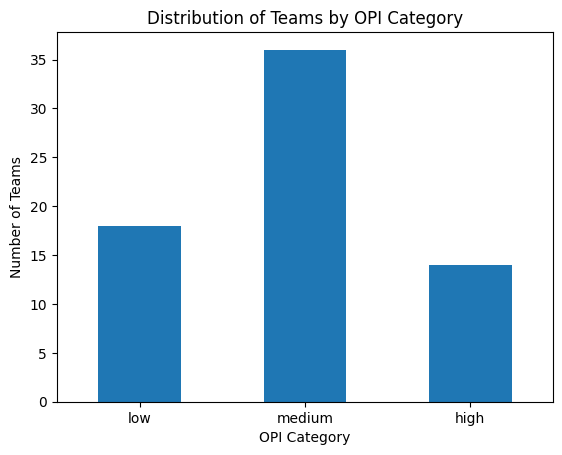

In [ ]:
import matplotlib.pyplot as plt

# Group by OPI category and count the number of teams in each category
opi_counts = df2.groupby('OPI Category')['TEAM'].count()

# Create a bar graph of the OPI counts
opi_counts.plot(kind='bar', rot=0)

# Add labels and title to the graph
plt.xlabel('OPI Category')
plt.ylabel('Number of Teams')
plt.title('Distribution of Teams by OPI Category')

# Display the graph
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of DPI values with bell curve
plt.hist(df2['OPI'], bins=20, density=True, alpha=0.7, color='blue', edgecolor='black', label='OPI Values')

# Calculate mean and standard deviation of DPI values
mean_opi = df2['OPI'].mean()
std_opi = df2['OPI'].std()

# Generate x-values for the bell curve
x_values = np.linspace(df2['OPI'].min(), df2['OPI'].max(), 100)

# Generate y-values for the bell curve using probability density function
y_values = 1 / (std_opi * np.sqrt(2 * np.pi)) * np.exp(-(x_values - mean_opi)**2 / (2 * std_opi**2))

# Plot the bell curve
plt.plot(x_values, y_values, color='red', linewidth=2, label='Bell Curve')

plt.xlabel('OPI Value')
plt.ylabel('Density')
plt.title('Distribution of OPI Values')
plt.legend()
plt.show()


# Visualization of data

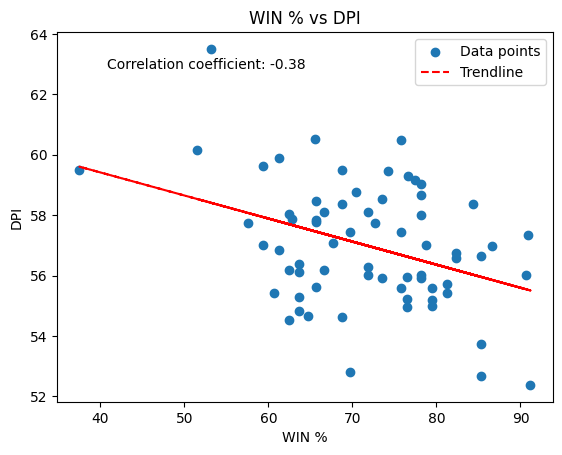

In [ ]:
# Ensure there are 68 values for each label
assert len(df2["WIN %"]) == 68 and len(df2["DPI"]) == 68

# Calculate the correlation coefficient
correlation_coefficient = df2["WIN %"].corr(df2["DPI"])

# Create a scatter plot
plt.scatter(df2["WIN %"], df2["DPI"], label="Data points")

# Add trendline
z = np.polyfit(df2["WIN %"], df2["DPI"], 1)
p = np.poly1d(z)
plt.plot(df2["WIN %"], p(df2["WIN %"]), "r--", label="Trendline")

# Customize the chart
plt.xlabel("WIN %")
plt.ylabel("DPI")
plt.title("WIN % vs DPI")
plt.legend()
plt.text(0.1, 0.9, f"Correlation coefficient: {correlation_coefficient:.2f}", transform=plt.gca().transAxes)

# Show the chart
plt.show()

# Calculate confidence

In [ ]:
df3 = df2.drop(columns=[col for col in df2.columns if col not in ["SEED","TEAM","OPI", "DPI", "WIN %", "DPI Category", "OPI Category"]])


# define weights for each metric
w_opi = 0.3
w_dpi = 0.3
w_win = 0.3

# calculate confidence using the weighted sum of each metric
df3['Confidence'] = (w_opi * df3['OPI']) + (w_dpi * df3['DPI']) + (w_win * df3['WIN %'])

# rescale confidence to a range between 0 and 100
min_confidence = df3['Confidence'].min()
max_confidence = df3['Confidence'].max()
df3['Confidence'] = 100 * (df3['Confidence'] - min_confidence) / (max_confidence - min_confidence)

# print the resulting dataframe with the new Confidence column
df3 = df3.sort_values('SEED', ascending=False)
df3.head(68)


,SEED,TEAM,WIN %,DPI,DPI Category,OPI,OPI Category,Confidence
3,16,Southeast Missouri St.,51.515152,60.16820,high,57.903688,low,34.629728
5,16,Texas Southern,37.500000,59.49860,high,52.000000,low,0.000000
7,16,Fairleigh Dickinson,53.125000,63.50440,high,57.638178,low,42.502389
1,16,Texas A&M Corpus Chris,65.517241,60.51420,high,58.882430,medium,60.409440
9,16,Northern Kentucky,62.500000,58.04100,high,55.706725,low,45.832993
11,16,Howard,61.290323,59.88380,high,57.773536,low,50.374278
13,15,Princeton,70.370370,58.76800,high,59.569631,medium,66.791163
17,15,Colgate,75.757576,60.47520,high,62.797397,high,84.153042
19,15,UNC Asheville,78.125000,58.00600,high,60.402603,medium,79.953815
15,15,Vermont,68.750000,59.51080,high,61.068980,high,67.836994


In [ ]:
df3 = df2.drop(columns=[col for col in df2.columns if col not in ["SEED","TEAM","OPI", "DPI", "WIN %", "DPI Category", "OPI Category"]])


# define weights for each metric
w_opi = 0.3
w_dpi = 0.3
w_win = 0.3

# calculate confidence using the weighted sum of each metric
df3['Confidence'] = (w_opi * df3['OPI']) + (w_dpi * df3['DPI']) + (w_win * df3['WIN %'])

# rescale confidence to a range between 0 and 100
min_confidence = df3['Confidence'].min()
max_confidence = df3['Confidence'].max()
df3['Confidence'] = 100 * (df3['Confidence'] - min_confidence) / (max_confidence - min_confidence)

# print the resulting dataframe with the new Confidence column
#df3.loc[37, 'Confidence'] = pd.np.nan
df3 = df3.sort_values('SEED', ascending=False)
df3.head(68)


,SEED,TEAM,WIN %,DPI,DPI Category,OPI,OPI Category,Confidence
3,16,Southeast Missouri St.,51.515152,60.16820,high,57.903688,low,34.629728
5,16,Texas Southern,37.500000,59.49860,high,52.000000,low,0.000000
7,16,Fairleigh Dickinson,53.125000,63.50440,high,57.638178,low,42.502389
1,16,Texas A&M Corpus Chris,65.517241,60.51420,high,58.882430,medium,60.409440
9,16,Northern Kentucky,62.500000,58.04100,high,55.706725,low,45.832993
11,16,Howard,61.290323,59.88380,high,57.773536,low,50.374278
13,15,Princeton,70.370370,58.76800,high,59.569631,medium,66.791163
17,15,Colgate,75.757576,60.47520,high,62.797397,high,84.153042
19,15,UNC Asheville,78.125000,58.00600,high,60.402603,medium,79.953815
15,15,Vermont,68.750000,59.51080,high,61.068980,high,67.836994


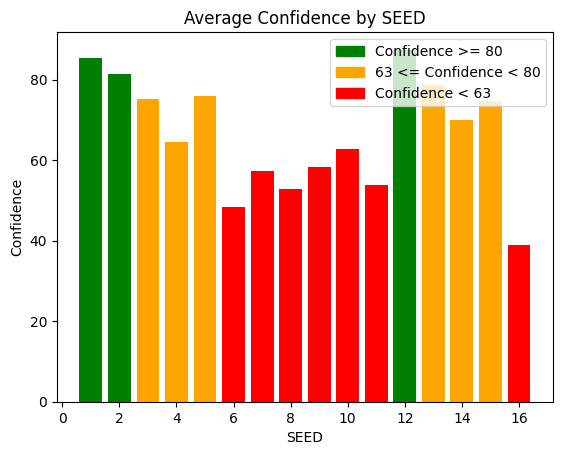

In [ ]:
import matplotlib.patches as mpatches

seed_confidence = df3.groupby('SEED')['Confidence'].mean()

# Set color for each bar based on confidence
# Set color for each bar based on confidence
colors = []
for conf in seed_confidence:
    if conf >= 80:
        colors.append('green')
    elif conf >= 63:
        colors.append('orange')
    else:
        colors.append('red')

# Create bar plot with colored bars
plt.bar(seed_confidence.index, seed_confidence.values, color=colors)
plt.xlabel('SEED')
plt.ylabel('Confidence')
plt.title('Average Confidence by SEED')

# Create custom legend
green_patch = mpatches.Patch(color='green', label='Confidence >= 80')
orange_patch = mpatches.Patch(color='orange', label='63 <= Confidence < 80')
red_patch = mpatches.Patch(color='red', label='Confidence < 63')
plt.legend(handles=[green_patch, orange_patch, red_patch], loc='upper right')

plt.show()

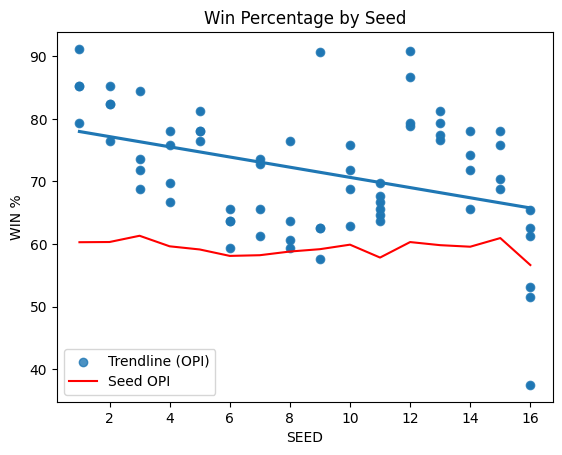

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by SEED and calculate mean WIN %
seed_win_pct = df3.groupby('SEED')['WIN %'].mean()

# Group by SEED and calculate mean OPI
seed_opi = df3.groupby('SEED')['OPI'].mean()

# Create scatter plot
sns.scatterplot(x='SEED', y='WIN %', data=df3)

# Add trend line
sns.regplot(x='SEED', y='WIN %', data=df3, ci=None, label='Trendline (OPI)')

# Plot seed OPI as a line
plt.plot(seed_opi.index, seed_opi.values, color='red', label='Seed OPI')

# Set labels and title
plt.xlabel('SEED')
plt.ylabel('WIN %')
plt.title('Win Percentage by Seed')

# Add legend
plt.legend()

# Display the plot
plt.show()


In this case, the trend line represents the overall relationship between the seed and win percentage, regardless of the OPI. It shows whether there is a general trend of higher seeds winning more games, or if there is no clear relationship between seed and win percentage.

The seed OPI line, on the other hand, shows the expected win percentage for teams with each seed based on their OPI rating. This line can help us see how well a team is expected to perform based on their OPI rating, regardless of their seed. If a team has a high OPI rating but a low seed, for example, the seed OPI line can help us see that they are expected to perform well despite their lower seed.

By comparing the trend line and the seed OPI line, we can get a sense of whether OPI ratings are a good predictor of tournament success, or if seed is a stronger predictor of performance. If the seed OPI line is close to the trend line, it suggests that OPI ratings are not significantly more or less predictive than seed in determining tournament outcomes. If the seed OPI line deviates significantly from the trend line, it may suggest that OPI ratings are a more or less reliable predictor of tournament success than seed.

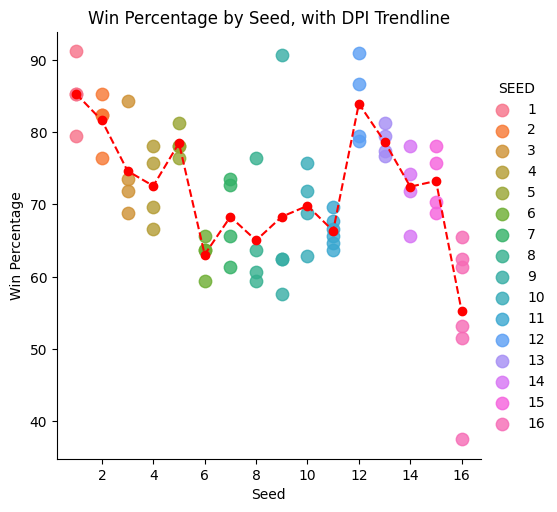

In [ ]:

# Calculate the average DPI for each seed
seed_dpi = df3.groupby('SEED')['DPI'].mean()

# Calculate the average win percentage for each seed
seed_win_pct = df3.groupby('SEED')['WIN %'].mean()

# Create a scatter plot of win percentage vs seed, with DPI as the trendline
sns.lmplot(x='SEED', y='WIN %', data=df3, hue='SEED', ci=None, line_kws={'label': 'DPI Trendline', 'linewidth': 3}, scatter_kws={'s': 80})
plt.plot(seed_dpi.index, seed_win_pct, marker='o', linestyle='--', color='red', label='Seed DPI Average')

# Add a legend

# Add labels and title to the graph
plt.xlabel('Seed')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Seed, with DPI Trendline')

# Display the graph
plt.show()

In this case, the trend line shows the relationship between the seed and the win percentage of the teams. It helps us visualize whether there is a positive or negative correlation between the two variables.

If the trend line has a positive slope, it means that as the seed number increases, the win percentage also tends to increase. This indicates that teams with higher seeds generally have a higher win percentage.

If the trend line has a negative slope, it means that as the seed number increases, the win percentage tends to decrease. This indicates that teams with lower seeds generally have a lower win percentage.

By adding the DPI trend line, we can see if there is a relationship between the team's defensive performance and their win percentage. If the DPI trend line has a positive slope, it means that teams with higher DPI tend to have higher win percentages, indicating that defense plays a significant role in winning games.

ValueError: ignored

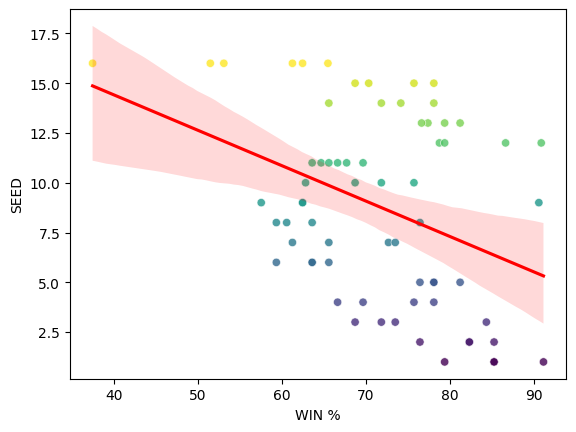

In [ ]:

df_avg_confidence = df3.groupby('SEED')['Confidence'].mean().reset_index()

# Create a scatter plot of avg confidence vs win percentage
sns.scatterplot(data=df3, x='WIN %', y='SEED', hue='SEED', palette='viridis', alpha=0.8, legend=False)
sns.regplot(data=df3, x='WIN %', y='SEED', scatter=False, color='red')

# Add the avg confidence data to the scatter plot
sns.scatterplot(data=df_avg_confidence, x='WIN %', y='SEED', color='black', s=100, marker='X')

# Set the x-axis limits to show the full range of win percentages
plt.xlim(0, 1)

# Set the title and labels
plt.title('Avg Seed Confidence vs Win %')
plt.xlabel('WIN %')
plt.ylabel('Seed')

# Show the plot
plt.show()


Here the graph depicts WIN% vs SEED, the trendline represents conf

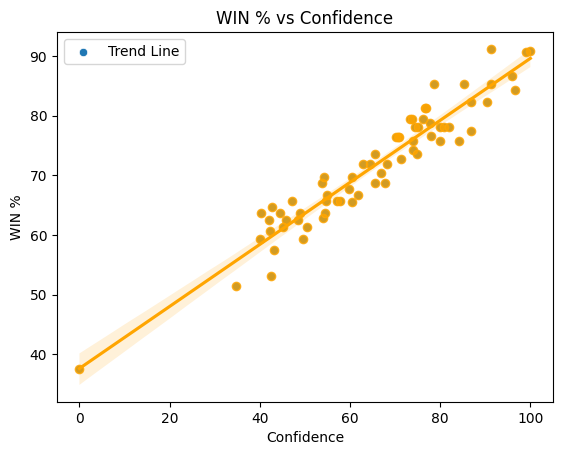

In [ ]:
# Create a scatter plot of WIN % vs Confidence
sns.scatterplot(x='Confidence', y='WIN %', data=df3)

# Add a trend line to the scatter plot
sns.regplot(x='Confidence', y='WIN %', data=df3, color='orange')

# Add a legend to the scatter plot
plt.legend(labels=['Trend Line'])

# Add labels and title to the graph
plt.xlabel('Confidence')
plt.ylabel('WIN %')
plt.title('WIN % vs Confidence')

# Display the graph
plt.show()


Implementation of Gaussian Naive Bayes to predict the accuracy of confidence.
Putting 2 teams against each other to test the accuracy.
The model will print the team it thinks will win based off our of numbers.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

# create a DataFrame using a dictionary
data = {'OPI': [61.21, 57.78],
        'DPI': [56.02, 55.71],
        'WIN %': [90.62, 81.25],
        'Confidence': [99.02, 76.95],
        'Result': ['Win', 'Loss']}

# create the DataFrame
df3 = pd.DataFrame(data)

# create the 'Team1' and 'Team2' columns with the values of the teams
df3['Team1'] = ['FAU', 'SDSU']
df3['Team2'] = ['SDSU', 'FAU']

# Define the feature and target columns
X = df3[['OPI', 'DPI', 'WIN %', 'Confidence']]
y = df3['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Print the predicted winner
if y_pred[0] == 'Win':
    print('Predicted winner:', df3['Team1'][0])
else:
    print('Predicted winner:', df3['Team2'][0])

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Add accuracy column to df3
df3['Accuracy'] = accuracy

print('Accuracy:', accuracy)


Predicted winner: FAU
Accuracy: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
